In this analysis, I explore Netflix’s catalog to identify trends in content type, genre, and country over time. Using Pandas and Seaborn, I analyze patterns to understand Netflix’s content strategy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt


Data Loading & Cleaning

In [19]:
df = pd.read_csv("netflix_titles.csv")

Showing first 5 rows

In [3]:
print(df.head())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

Showing basic info about columns

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


Checking missing values

In [5]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Shape of dataset (rows, columns)


In [6]:
print("Shape:", df.shape)


Shape: (8807, 12)


Showing unique content types (Movie, TV Show)

In [7]:
print(df['type'].unique())

['Movie' 'TV Show']


In [8]:
df['country'].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

In [9]:
type_counts = df['type'].value_counts()

PLOT 1: Movies vs TV Shows count

This shows overall content distribution.

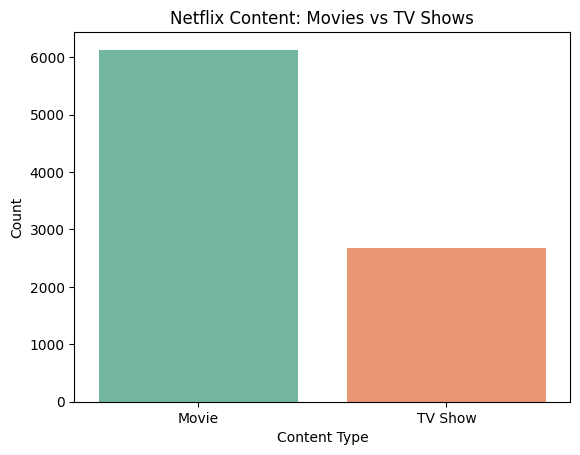

In [10]:
type_counts = df['type'].value_counts().reset_index()
type_counts.columns = ['Content Type', 'Count']

# Plot
sns.barplot(data=type_counts, x="Content Type", y="Count",
            hue="Content Type", palette="Set2", legend=False)

plt.title("Netflix Content: Movies vs TV Shows")
plt.ylabel("Count")
plt.xlabel("Content Type")
plt.show()

PLOT 2: Content added by release year

This shows how Netflix’s catalogue has changed over time

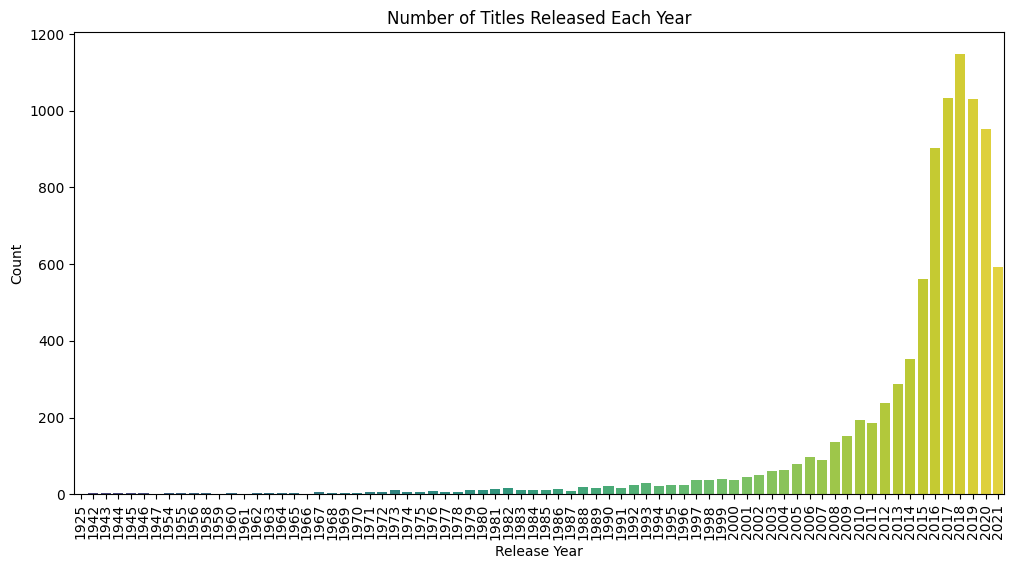

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="release_year",
              hue="release_year",  # assign hue same as x
              palette="viridis", legend=False,
              order=sorted(df['release_year'].dropna().unique()))

plt.title("Number of Titles Released Each Year")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.xlabel("Release Year")
plt.show()

Insight 1: Sharp growth after 2015–2016 coincides with Netflix’s expansion to almost every country worldwide.

Insight 2: The dip in 2020 likely reflects the COVID-19 pandemic, which delayed productions, though streaming demand was at its peak.

PLOT 3: Top 10 Countries by Number of Titles

This shows which countries contribute the most to Netflix’s catalogue.

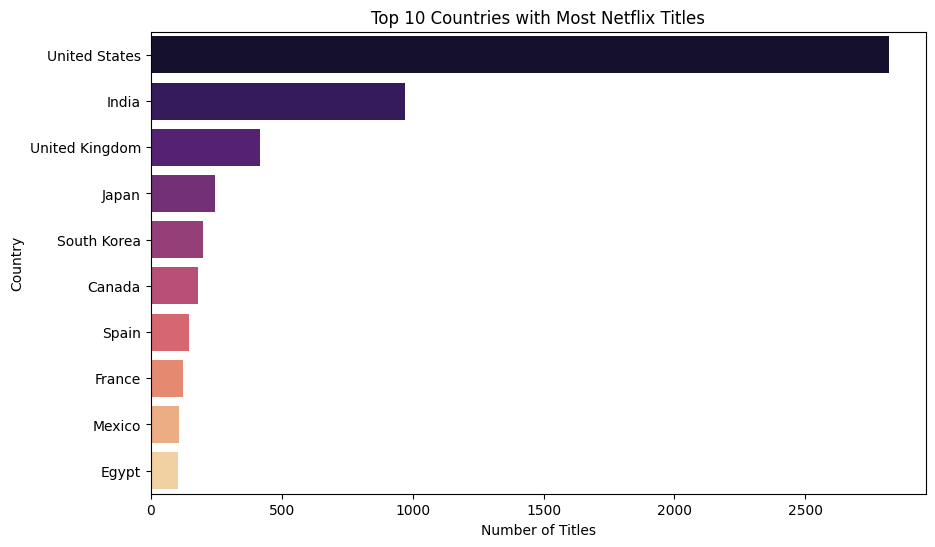

In [12]:
df_country = df.dropna(subset=['country'])

# Count titles per country
country_counts = df_country['country'].value_counts().head(10).reset_index()
country_counts.columns = ['Country', 'Count']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=country_counts, x="Count", y="Country",
            hue="Country", palette="magma", legend=False)

plt.title("Top 10 Countries with Most Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

Insight 1: The U.S. dominates Netflix content, followed by India, the U.K., and others, reflecting Netflix’s roots and strong English-speaking markets.

Insight 2: India’s high rank shows Netflix’s push into regional markets where affordable streaming subscriptions are growing fastest.

PLOT 4 and 5: Top 5 genres over time, and Heatmap (Genre vs Year)

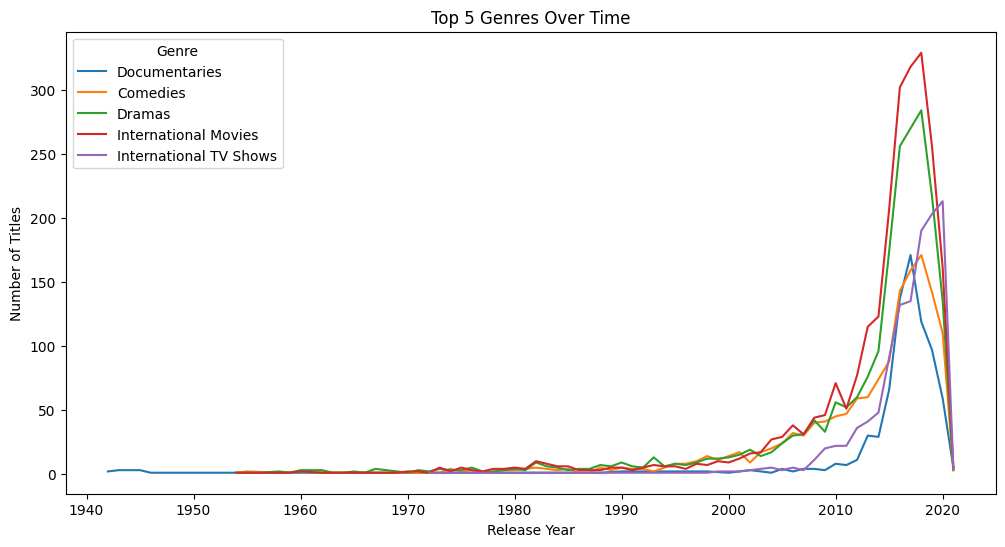

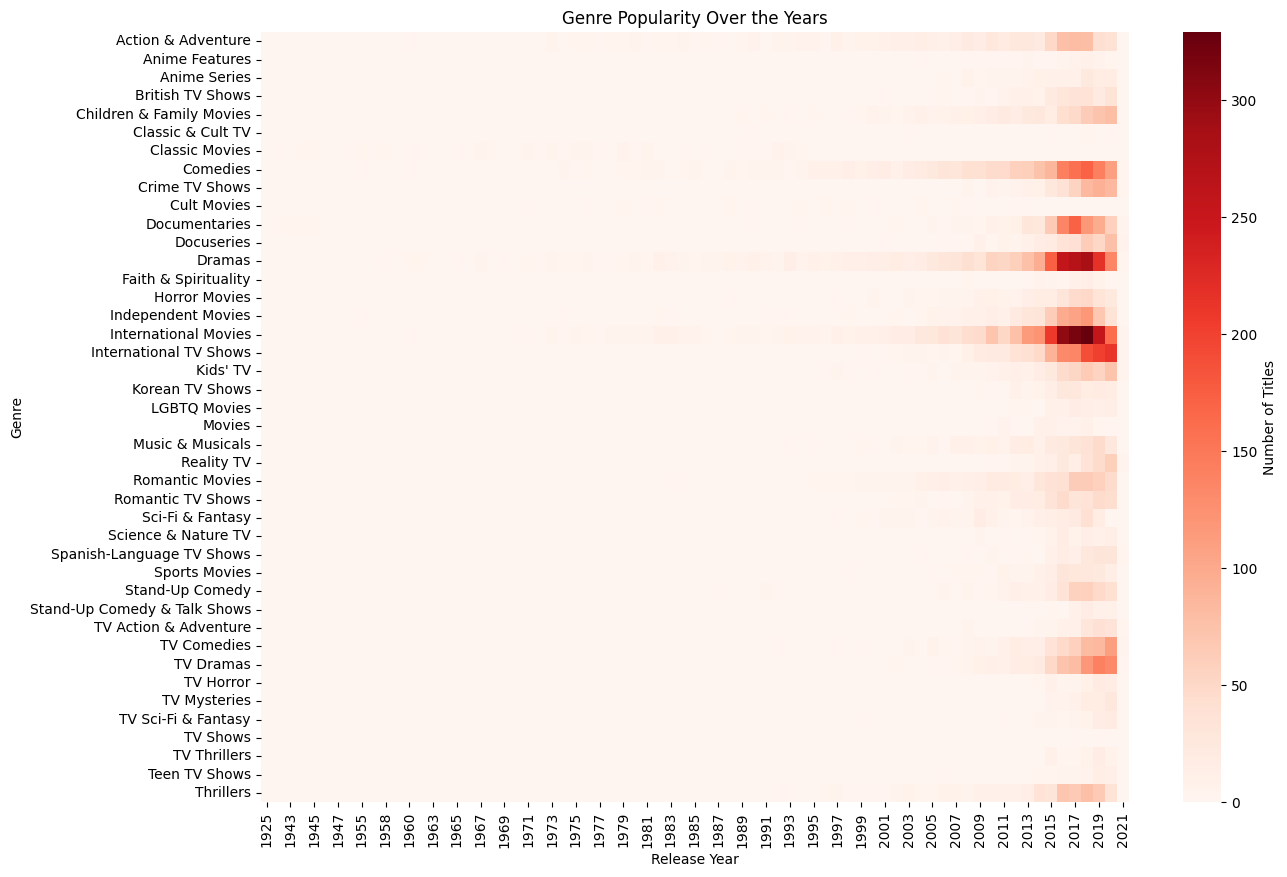

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Netflix_movies_and_tv_shows_clustering.csv")

# Copy dataframe so we don't mess with original
df_genre = df[['release_year', 'listed_in']].dropna().copy()

# Step 1: Split genres into multiple rows
df_genre = df_genre.assign(listed_in=df_genre['listed_in'].str.split(', ')).explode('listed_in')

# Step 2: Group by year and genre
genre_trends = df_genre.groupby(['release_year', 'listed_in']).size().reset_index(name='count')

# Step 3a: Lineplot (Top 5 genres over time)
top_genres = genre_trends.groupby('listed_in')['count'].sum().sort_values(ascending=False).head(5).index
plt.figure(figsize=(12,6))
sns.lineplot(data=genre_trends[genre_trends['listed_in'].isin(top_genres)],
             x='release_year', y='count', hue='listed_in')
plt.title('Top 5 Genres Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title="Genre")
plt.show()

# Step 3b: Heatmap (Genre vs Year)
pivot = genre_trends.pivot(index='listed_in', columns='release_year', values='count').fillna(0)
plt.figure(figsize=(14,10))
sns.heatmap(pivot, cmap="Reds", cbar_kws={'label': 'Number of Titles'})
plt.title('Genre Popularity Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Genre')
plt.show()

Insight 1: Genres like Documentaries and Stand-up Comedy exploded in the late 2010s, probably because they are cheaper and faster to produce than big films. They form the backbone of Netflix’s library, aligning with mainstream audience demand.

Insight 2: Animation, Horror, and Stand-up Comedy are niche but present, showing Netflix’s effort to diversify its catalog to appeal to different subcultures.

Insight 3: Drama and International films expanded steadily, showing Netflix’s bet on global storytelling and attracting non-U.S. audiences.

PLOT 6: Actor Frequency

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5792\2351986052.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_actors.index, x=top_actors.values, palette="viridis")


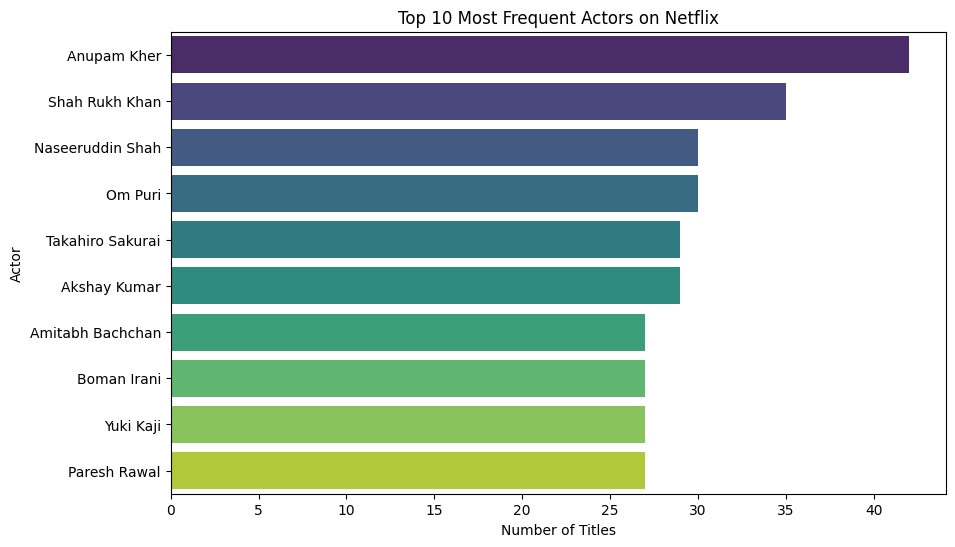

In [14]:
# Actor frequency
df_actors = df[['cast']].dropna().copy()
df_actors = df_actors.assign(cast=df_actors['cast'].str.split(', ')).explode('cast')

top_actors = df_actors['cast'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_actors.index, x=top_actors.values, palette="viridis")
plt.title("Top 10 Most Frequent Actors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Actor")
plt.show()

Highlights Bollywood stars, since Indian content on Netflix is extensive.

PLOT 7: Director Frequency

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5792\734067965.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_directors.index, x=top_directors.values, palette="magma")


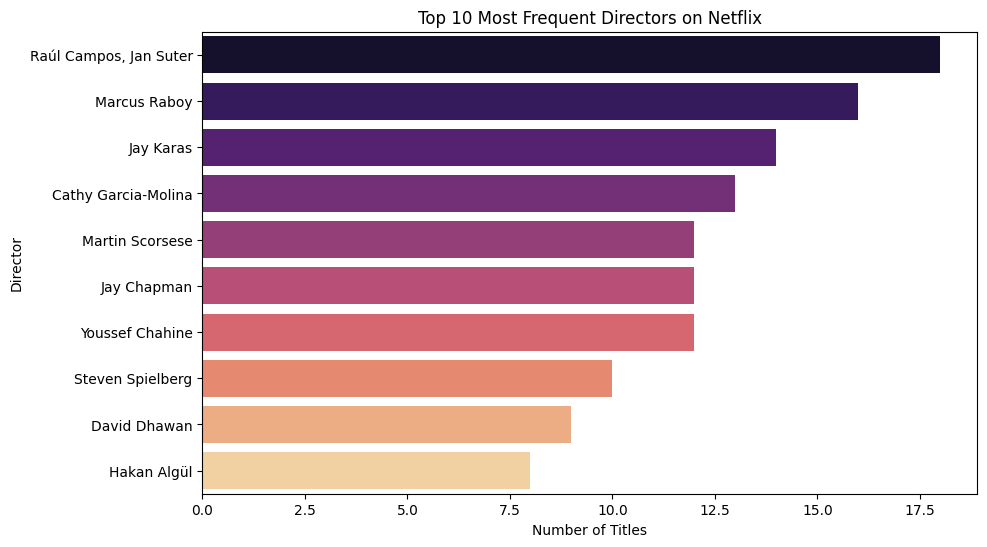

In [15]:
df_directors = df[['director']].dropna().copy()
top_directors = df_directors['director'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_directors.index, x=top_directors.values, palette="magma")
plt.title("Top 10 Most Frequent Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5792\1932074495.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Actor', data=actors_df, palette='mako')


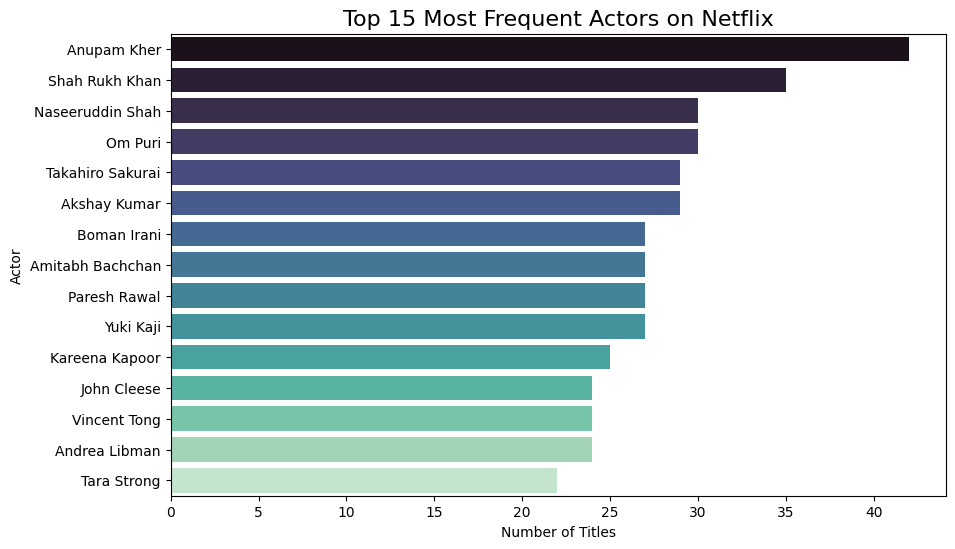

In [17]:
from collections import Counter

# Drop rows with no cast info
cast_data = df['cast'].dropna()

# Split by comma and flatten into a single list
all_cast = []
for row in cast_data:
    all_cast.extend([actor.strip() for actor in row.split(',')])

# Count frequencies
actor_counts = Counter(all_cast)

# Top 15 actors
top_actors = actor_counts.most_common(15)

# Convert to DataFrame for plotting
actors_df = pd.DataFrame(top_actors, columns=['Actor', 'Count'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Actor', data=actors_df, palette='mako')
plt.title("Top 15 Most Frequent Actors on Netflix", fontsize=16)
plt.xlabel("Number of Titles")
plt.ylabel("Actor")
plt.show()


PLOT 8: Comparison of growth of movies and TV shows with time

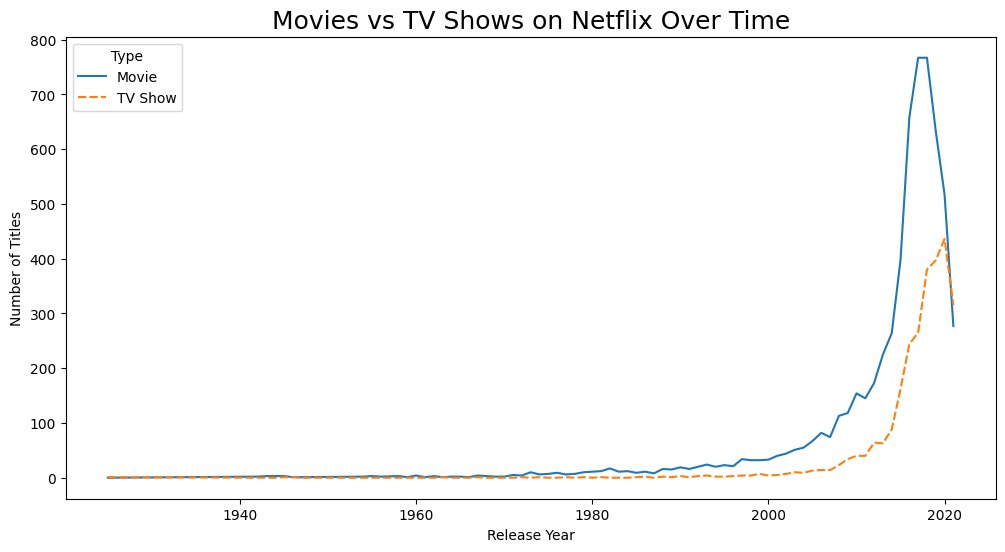

In [21]:
# Step 1: Count Movies vs TV Shows by release year
type_counts = df.groupby(['release_year', 'type']).size().reset_index(name='count')

# Step 2: Pivot for line plot
type_pivot = type_counts.pivot(index='release_year', columns='type', values='count').fillna(0)

# Step 3: Plot line chart
plt.figure(figsize=(12,6))
sns.lineplot(data=type_pivot)
plt.title("Movies vs TV Shows on Netflix Over Time", fontsize=18)
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend(title="Type")
plt.show()


Insight 1: Netflix made a major shift after 2015 — TV Shows started growing faster than Movies, suggesting a strategy to retain subscribers with long-form, episodic content.
Insight 2: Movie releases plateaued after ~2017, showing that Netflix likely deprioritized standalone films in favor of series.

Key Insights from the Analysis

1. Shift Toward TV Shows (Post-2015): Netflix pivoted strongly towards producing TV Shows after 2015, prioritizing episodic content to boost subscriber retention over standalone movies.

2. Geographic Expansion: While the U.S. dominates Netflix content, countries like India and the U.K. are rising fast, reflecting Netflix’s global growth strategy and emphasis on regional markets.

3. Genre Diversity: Core genres like Drama, Comedy, and Documentaries dominate Netflix’s catalog, but niche genres like Stand-up Comedy, Horror, and Animation show Netflix’s strategy to capture diverse audience segments.

4. Impact of Global Events: Content releases surged between 2015–2019 during Netflix’s worldwide expansion, but dipped in 2020, likely due to COVID-19 production delays despite high streaming demand.

5. Genre Evolution Over Time: The heatmap shows that Documentaries and Stand-up Comedy grew rapidly in the late 2010s, suggesting Netflix’s focus on cost-effective, quick-to-produce content to balance its portfolio.